In [1]:
#!/usr/bin/python
# -*- coding:utf-8 -*-
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from datetime import datetime
from collections import Counter
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.linear_model import RANSACRegressor
import scipy.stats
from matplotlib import style
from datetime import timedelta

from matplotlib import colors, cm
Net_df = pd.read_csv('Data/Net_df_1223_total_region.csv')

Net_df['inf_time'] = pd.to_datetime(Net_df['inf_time'], format="%Y-%m-%d", errors='ignore')
Net_df['inf_time'] = Net_df['inf_time'].dt.date
Net_df['Primary_id'] = Net_df['Primary_id'].astype(int)

delay_median : 6.000, degree_median : 0.000
delay_mean : 6.578, degree_mean : 0.403
2355.0
delay_median : 4.000, degree_median : 1.000
delay_mean : 4.756, degree_mean : 1.256
191.0
delay_median : 4.000, degree_median : 1.000
delay_mean : 4.880, degree_mean : 0.930
1086.0
delay_median : 4.000, degree_median : 1.000
delay_mean : 5.002, degree_mean : 1.383
6057.0
delay_median : 3.000, degree_median : 0.000
delay_mean : 4.279, degree_mean : 0.837
5337.0
delay_median : 3.000, degree_median : 0.000
delay_mean : 3.507, degree_mean : 0.408
3698.0


<Figure size 432x288 with 0 Axes>

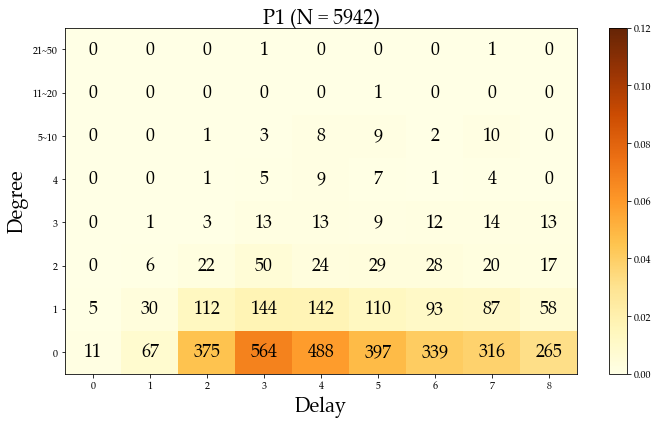

<Figure size 432x288 with 0 Axes>

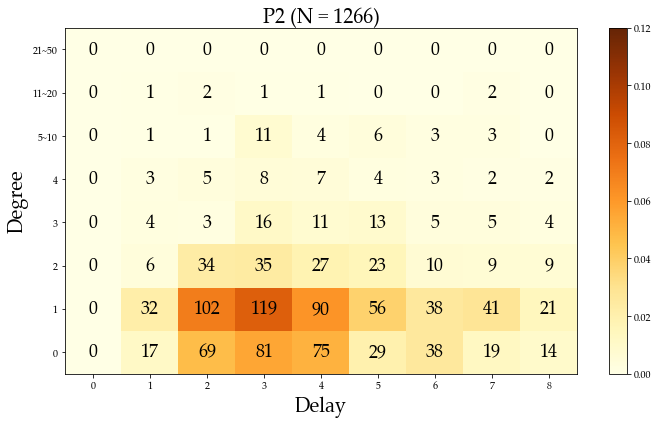

<Figure size 432x288 with 0 Axes>

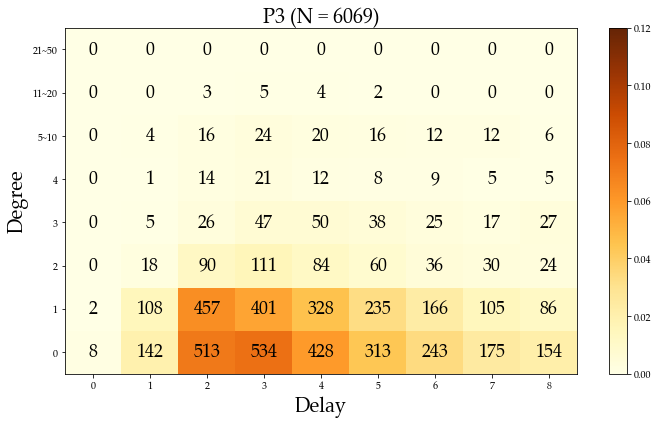

<Figure size 432x288 with 0 Axes>

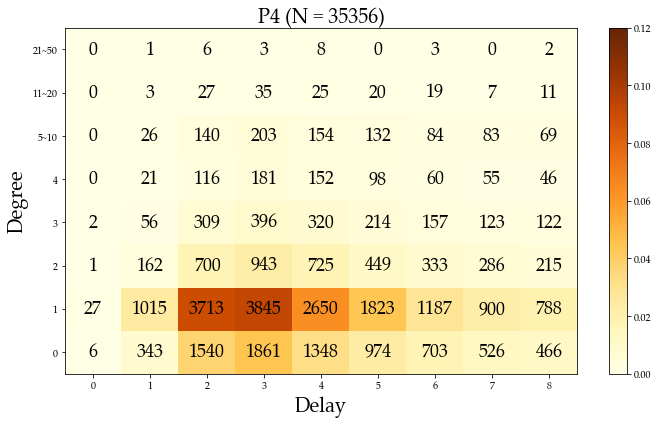

<Figure size 432x288 with 0 Axes>

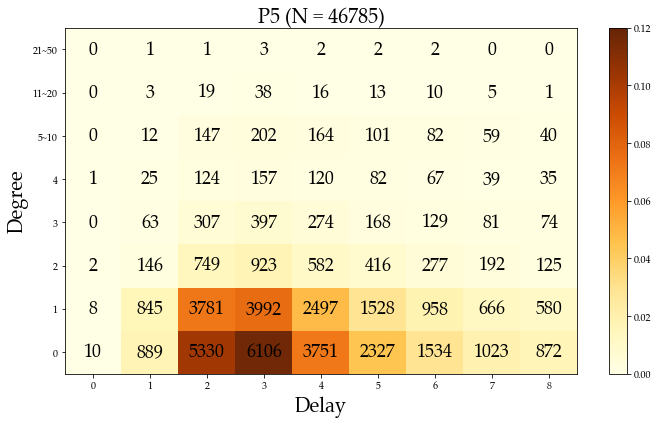

<Figure size 432x288 with 0 Axes>

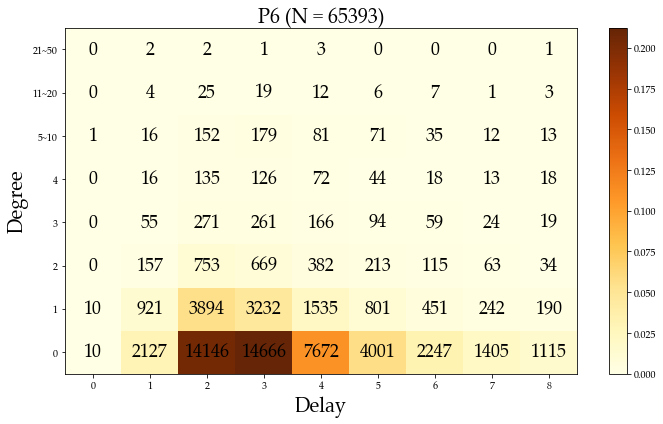

In [2]:
## 색 바꾸기, 비율 표시해보기 -> 전체의 몇 퍼센트가 Delay 2일 내에 1명 내로 감염시킨 사람이다. 이런식으로 말할 수 있음.

plt.rcParams["font.family"] = "Palatino Linotype"
Delay_list = []
target_date = ['2020-01-19', '2020-04-30', '2020-07-15', '2020-10-13', '2021-02-26', '2021-07-12', '2021-09-16']
# target_date = ['2020-01-19', '2021-09-16']
for i in range(len(target_date)):
    target_date[i] = datetime.strptime(target_date[i], "%Y-%m-%d").date()

for i in range(len(target_date) - 1):
    Net_df_1 = Net_df.loc[:][(Net_df.loc[:,'inf_time'] >= target_date[i]) & (Net_df.loc[:,'inf_time'] < target_date[i + 1])]
    del Net_df_1['Unnamed: 0']
    
    for i2 in Net_df_1.index:
        if len(Net_df_1.loc[i2, 'Onset_date']) != 1:
            Net_df_1.loc[i2, 'Onset_date'] = datetime.strptime(Net_df_1.loc[i2, 'Onset_date'][0:10], "%Y-%m-%d").date()

    Net_df_Onset_0 = Net_df_1.loc[:][Net_df_1.loc[:, 'Onset_date'] == '0'].index
    Net_df2 = Net_df_1.drop(Net_df_Onset_0)

    date_diff = []
    date_degree = []
    counter_list = []
    G = nx.from_pandas_edgelist(Net_df_1, source='Primary_id', target='id',create_using=nx.DiGraph())
    G.remove_node(0)
    degree_all = G.degree
    for i2 in Net_df2.index:

        # date_to_compare1 = datetime.strptime(Net_df2['inf_time'][i] , "%Y-%m-%d")
        # date_to_compare2 = datetime.strptime(Net_df2.loc[i2, 'Onset_date'], "%Y-%m-%d").date()
        date_to_compare2 = Net_df2.loc[i2, 'Onset_date']
        date_to_compare1 = Net_df2.loc[i2, 'inf_time']
        
        date_diff.append((date_to_compare1 - date_to_compare2).days)
        date_degree.append(degree_all(Net_df2.loc[i2, 'id']))
        
    print('delay_median : {0:.3f}, degree_median : {1:.3f}'.format(np.median(date_diff), np.median(date_degree)))
    print('delay_mean : {0:.3f}, degree_mean : {1:.3f}'.format(np.mean(date_diff), np.mean(date_degree)))
        
    Net_df2.loc[:,'Delay'] = date_diff
    Net_df2.loc[:,'Degree'] = date_degree
    
    # print(Net_df2)/
    for i2 in Net_df2.index:
        
        if (Net_df2.loc[i2,'Delay'] >= 0) & (Net_df2.loc[i2,'Degree'] <=30):
            # delay가 음수인건 제외
            # degree가 30 이상인건 제외
            counter_list.append((Net_df2.loc[i2,'Delay'],Net_df2.loc[i2,'Degree']))
            
    counter_xy = Counter(counter_list).keys()
    counter_z = Counter(counter_list).values()
    
    delay_3d = []
    degree_3d = []
    counter_3d = []
    for i2 in range(len(counter_xy)):
        delay_3d.append(list(counter_xy)[i2][0])
        degree_3d.append(list(counter_xy)[i2][1])
        counter_3d.append(list(counter_z)[i2])
        
    Delay_list.append(delay_3d)
    
    # delay_list = []
    degree_list = []
    delay_degree_df = pd.DataFrame({})
    zero_tmp = [0]*2000
    
    # ## 여기를 잘못 짰음
    # for i2 in [0 + i1 for i1 in range(30)]: # Delay, column
    #     delay_degree_df.loc[:,str(i2)] = zero_tmp # Dataframe을 zero로 할당해줌.
 
    #     del_loc = np.where(i2 == np.array(delay_3d))
    #     for i3 in range(len(del_loc)):
    #         if len(del_loc[0]) != 0:
    #             if del_loc[0][i3] < 30:
    #                 delay_degree_df.loc[degree_3d[del_loc[0][i3]],str(i2)] = list(counter_z)[del_loc[0][i3]]
                    
    for i2 in [0 + i1 for i1 in range(30)]: # Delay, column
        delay_degree_df.loc[:,str(i2)] = zero_tmp # Dataframe을 zero로 할당해줌.

        del_loc = np.where(i2 == np.array(delay_3d))
        # print(i2, del_loc, len(del_loc[0]))
        for i3 in range(len(del_loc[0])):
            if len(del_loc[0]) != 0:
                if degree_3d[del_loc[0][i3]] < 30:
                    # print(degree_3d[del_loc[0][i3]],i2, list(counter_z)[del_loc[0][i3]])
                    delay_degree_df.loc[degree_3d[del_loc[0][i3]],str(i2)] = list(counter_z)[del_loc[0][i3]]                


    delay_degree_df_2 = delay_degree_df.loc[0:4].copy()
    delay_degree_df_2.loc[5,[str(i3) for i3 in range(30)]] = list(delay_degree_df.loc[5:10].sum())
    delay_degree_df_2.loc[6,[str(i3) for i3 in range(30)]] = list(delay_degree_df.loc[11:20].sum())
    delay_degree_df_2.loc[7,[str(i3) for i3 in range(30)]] = list(delay_degree_df.loc[21:50].sum())
    # delay_degree_df_2.loc[8,[str(i3) for i3 in range(30)]] = list(delay_degree_df.loc[51:100].sum())
    # delay_degree_df_2.loc[9,[str(i3) for i3 in range(30)]] = list(delay_degree_df.loc[101:2000].sum())
    # delay_degree_df_2.loc[10,[str(i3) for i3 in range(30)]] = list(delay_degree_df.loc[201:2000].sum())
    
    delay_degree_df_2['etc ~'] = delay_degree_df_2[[str(i+8) for i in range(22)]].sum(axis=1)
    sum_ = sum(delay_degree_df_2.sum())
    # print(sum_)
    etc_sum_ = delay_degree_df_2['etc ~'].sum()
    
    # print(delay_degree_df_2)
    delay_degree_df_2 = delay_degree_df_2.drop(['etc ~'], axis=1)
    # print(delay_degree_df_2)
    delay_degree_df_2 = delay_degree_df_2.drop([str(i+9) for i in range(21)], axis='columns')
    
    diff_sum = sum_ - etc_sum_
    print(etc_sum_)
    delay_degree_df_text = delay_degree_df_2.copy()
    delay_degree_df_2 = delay_degree_df_2/sum_
    
    plt.figure(i * 7 + 4)
    fig, ax = plt.subplots(figsize=(10, 6))
    # plt.subplot(3,2,i+1)
    plt.pcolor(delay_degree_df_2, cmap='YlOrBr')
    # plt.xticks(np.arange(0.5, len(delay_degree_df_2.columns), 1), [0 + i1 for i1 in range(17)])
    plt.xticks(np.arange(0.5, len(delay_degree_df_2.columns), 1), [0 + i1 for i1 in range(9)])
    plt.yticks(np.arange(0.5, len(delay_degree_df_2.index), 1), [0 + i1 for i1 in range(8)])
    # plt.title(str(i+1) + ' th ' + 'Heatmap (N=' + str(div_sum) + ')', fontsize=20)
    
    for y in range(len(delay_degree_df_2.index)):
        for x in range(len(delay_degree_df_2.columns)):
            plt.text(x + 0.5, y + 0.5, '%.0f' % delay_degree_df_text.loc[y][x],
                        horizontalalignment='center',
                        verticalalignment='center',
                        fontsize=18)
            
    plt.xlabel('Delay', fontsize=20)
    plt.ylabel('Degree', fontsize=20)
    plt.title('P' + str(i+1) + ' (N = ' + str(int(diff_sum)) + ')', fontsize = 20)
    ax.set_yticklabels(['0','1','2','3','4','5~10','11~20','21~50'])#,'51~100','101~'])#,'201~1000'])
    # ax.set_xticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16~29'])
    ax.set_xticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8'])#, '9~'])
    plt.colorbar()
    if i != 5:
        plt.clim(0,0.12)
    plt.tight_layout()
    # plt.savefig(str(i+1) + ' ' + 'Period Delay and Degree Heatmap')
    # plt.savefig(str(i+1) + ' ' + 'Period Infector and Infectee Heatmap')#, format='eps')
plt.show()

SUBPLOTS

delay_median : 6.000, degree_median : 0.000
delay_mean : 6.578, degree_mean : 0.403


c:\Users\bm990\Desktop\백업\Python_Code\Infection_Tree\.venv\lib\site-packages\ipykernel_launcher.py:111: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


delay_median_Scale : 4.000, degree_median_Scale : 3.000
delay_mean_Scale : 4.393, degree_mean_Scale : 3.982
 
delay_median : 4.000, degree_median : 1.000
delay_mean : 4.756, degree_mean : 1.256
delay_median_Scale : 4.000, degree_median_Scale : 3.000
delay_mean_Scale : 4.444, degree_mean_Scale : 4.873
 
delay_median : 4.000, degree_median : 1.000
delay_mean : 4.880, degree_mean : 0.930
delay_median_Scale : 4.000, degree_median_Scale : 5.000
delay_mean_Scale : 4.264, degree_mean_Scale : 6.484
 


c:\Users\bm990\Desktop\백업\Python_Code\Infection_Tree\.venv\lib\site-packages\ipykernel_launcher.py:136: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


delay_median : 4.000, degree_median : 1.000
delay_mean : 5.002, degree_mean : 1.383
delay_median_Scale : 4.000, degree_median_Scale : 11.000
delay_mean_Scale : 4.304, degree_mean_Scale : 14.232
 
delay_median : 3.000, degree_median : 0.000
delay_mean : 4.279, degree_mean : 0.837
delay_median_Scale : 4.000, degree_median_Scale : 8.000
delay_mean_Scale : 4.233, degree_mean_Scale : 10.513
 


c:\Users\bm990\Desktop\백업\Python_Code\Infection_Tree\.venv\lib\site-packages\ipykernel_launcher.py:159: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


delay_median : 3.000, degree_median : 0.000
delay_mean : 3.507, degree_mean : 0.408
delay_median_Scale : 4.000, degree_median_Scale : 8.000
delay_mean_Scale : 4.007, degree_mean_Scale : 9.883
 


c:\Users\bm990\Desktop\백업\Python_Code\Infection_Tree\.venv\lib\site-packages\ipykernel_launcher.py:165: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


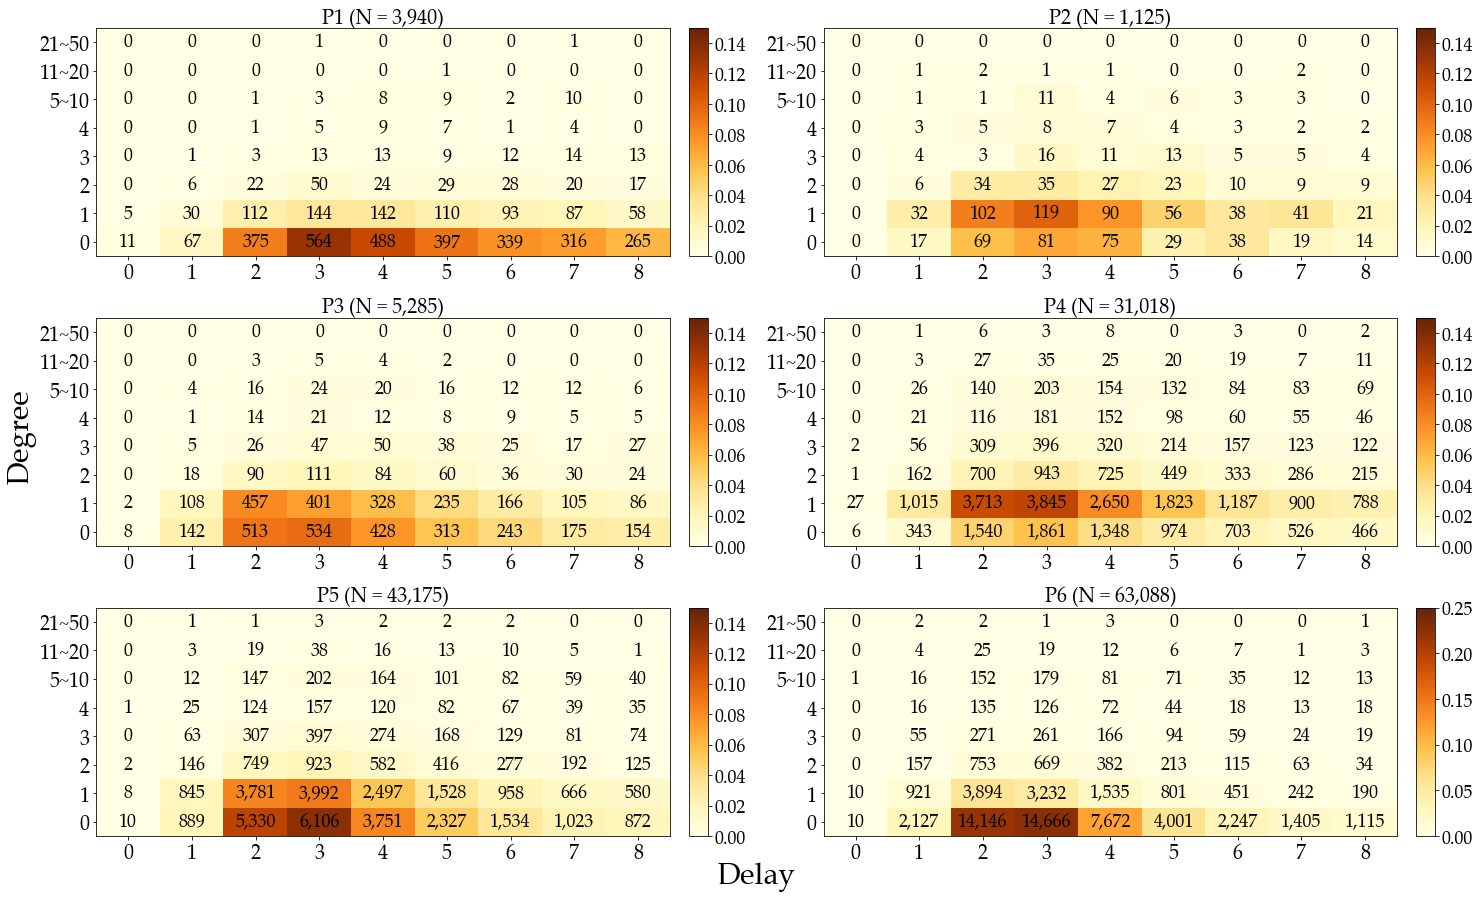

In [51]:
## 색 바꾸기, 비율 표시해보기 -> 전체의 몇 퍼센트가 Delay 2일 내에 1명 내로 감염시킨 사람이다. 이런식으로 말할 수 있음.


plt.rcParams["font.family"] = "Palatino Linotype"
fig, ax = plt.subplots(3,2, figsize=(20,12), constrained_layout=True)


target_date = ['2020-01-19', '2020-04-30', '2020-07-15', '2020-10-13', '2021-02-26', '2021-07-12', '2021-09-16']
# target_date = ['2020-01-19', '2020-04-30']
for i in range(len(target_date)):
    target_date[i] = datetime.strptime(target_date[i], "%Y-%m-%d").date()

for i in range(len(target_date) - 1):
    Net_df_1 = Net_df.loc[:][(Net_df.loc[:,'inf_time'] >= target_date[i]) & (Net_df.loc[:,'inf_time'] < target_date[i + 1])]
    del Net_df_1['Unnamed: 0']
    
    for i2 in Net_df_1.index:
        if len(Net_df_1.loc[i2, 'Onset_date']) != 1:
            Net_df_1.loc[i2, 'Onset_date'] = datetime.strptime(Net_df_1.loc[i2, 'Onset_date'][0:10], "%Y-%m-%d").date()

    Net_df_Onset_0 = Net_df_1.loc[:][Net_df_1.loc[:, 'Onset_date'] == '0'].index
    Net_df2 = Net_df_1.drop(Net_df_Onset_0)

    date_diff = []
    date_degree = []
    counter_list = []
    G = nx.from_pandas_edgelist(Net_df_1, source='Primary_id', target='id',create_using=nx.DiGraph())
    G.remove_node(0)
    degree_all = G.degree
    for i2 in Net_df2.index:

        # date_to_compare1 = datetime.strptime(Net_df2['inf_time'][i] , "%Y-%m-%d")
        # date_to_compare2 = datetime.strptime(Net_df2.loc[i2, 'Onset_date'], "%Y-%m-%d").date()
        date_to_compare2 = Net_df2.loc[i2, 'Onset_date']
        date_to_compare1 = Net_df2.loc[i2, 'inf_time']
        
        date_diff.append((date_to_compare1 - date_to_compare2).days)
        date_degree.append(degree_all(Net_df2.loc[i2, 'id']))
        
    print('delay_median : {0:.3f}, degree_median : {1:.3f}'.format(np.median(date_diff), np.median(date_degree)))
    print('delay_mean : {0:.3f}, degree_mean : {1:.3f}'.format(np.mean(date_diff), np.mean(date_degree)))
        
    Net_df2.loc[:,'Delay'] = date_diff
    Net_df2.loc[:,'Degree'] = date_degree
    
    # print(Net_df2)/
    for i2 in Net_df2.index:
        
        if (Net_df2.loc[i2,'Delay'] >= 0) & (Net_df2.loc[i2,'Degree'] <=50) & (Net_df2.loc[i2,'Delay'] <=8) & (Net_df2.loc[i2,'Degree'] >=0):
            # delay가 음수인건 제외
            # degree가 50 이상인건 제외
            counter_list.append((Net_df2.loc[i2,'Delay'],Net_df2.loc[i2,'Degree']))
            
    counter_xy = Counter(counter_list).keys() # Delay, Degree
    counter_z = Counter(counter_list).values()
    
    delay_3d = []
    degree_3d = []
    # counter_3d = []
    for i2 in range(len(counter_xy)):
        delay_3d.append(list(counter_xy)[i2][0])
        degree_3d.append(list(counter_xy)[i2][1])
        # counter_3d.append(list(counter_z)[i2])
    print('delay_median_Scale : {0:.3f}, degree_median_Scale : {1:.3f}'.format(np.median(delay_3d), np.median(degree_3d)))
    print('delay_mean_Scale : {0:.3f}, degree_mean_Scale : {1:.3f}'.format(np.mean(delay_3d), np.mean(degree_3d)))
    print(' ')
    delay_list = []
    degree_list = []
    delay_degree_df = pd.DataFrame({})
    zero_tmp = [0]*2000
                        
    delay_test = []
    degree_test = []
    for i2 in [0 + i1 for i1 in range(30)]: # Delay, column
        delay_degree_df.loc[:,str(i2)] = zero_tmp # Dataframe을 zero로 할당해줌.

        del_loc = np.where(i2 == np.array(delay_3d))
        # print(i2, del_loc, len(del_loc[0]))
        for i3 in range(len(del_loc[0])):
            if len(del_loc[0]) != 0:
                if degree_3d[del_loc[0][i3]] < 30:
                    # print(degree_3d[del_loc[0][i3]],i2, list(counter_z)[del_loc[0][i3]])
                    delay_degree_df.loc[degree_3d[del_loc[0][i3]],str(i2)] = list(counter_z)[del_loc[0][i3]]                
                    
                    delay_test.append(i2)

    delay_degree_df_2 = delay_degree_df.loc[0:4].copy()
    delay_degree_df_2.loc[5,[str(i3) for i3 in range(30)]] = list(delay_degree_df.loc[5:10].sum())
    delay_degree_df_2.loc[6,[str(i3) for i3 in range(30)]] = list(delay_degree_df.loc[11:20].sum())
    delay_degree_df_2.loc[7,[str(i3) for i3 in range(30)]] = list(delay_degree_df.loc[21:50].sum())
    
    delay_degree_df_2['etc ~'] = delay_degree_df_2[[str(i+8) for i in range(22)]].sum(axis=1)
    sum_ = sum(delay_degree_df_2.sum())
    # print(sum_)
    etc_sum_ = delay_degree_df_2['etc ~'].sum()
    
    delay_degree_df_2 = delay_degree_df_2.drop(['etc ~'], axis=1)
    delay_degree_df_2 = delay_degree_df_2.drop([str(i+9) for i in range(21)], axis='columns')
    
    diff_sum = sum_ - etc_sum_
    diff_sum = str(format(diff_sum.astype(int), ',')) # 이거! 콤마넣는거
    
    delay_degree_df_text = delay_degree_df_2.copy()
    # delay_degree_df_text2 = delay_degree_df_text.copy()
    delay_degree_df_text = delay_degree_df_text.astype(int)
    delay_degree_df_2 = delay_degree_df_2/sum_
    
    if i < 2:
        norm_ = colors.Normalize(0,0.15)
        pcm = ax[0,i].pcolormesh(delay_degree_df_2,cmap='YlOrBr',vmin=0,vmax=0.15)
        cbar = fig.colorbar(pcm, norm=norm_, ax=ax[0,i])
        for tick_ in cbar.ax.get_yticklabels():
            tick_.set_fontsize(18)
        ax[0,i].pcolor(delay_degree_df_2, cmap='YlOrBr', norm=norm_)
        ax[0,i].set_xticks(np.arange(0.5, len(delay_degree_df_2.columns), 1),  minor=False)
        ax[0,i].set_xticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8'], fontsize = 20)
        ax[0,i].set_yticks(np.arange(0.5, len(delay_degree_df_2.index), 1),  minor=False)
        ax[0,i].set_yticklabels(['0','1','2','3','4','5~10','11~20','21~50'], fontsize = 20)
        # plt.title(str(i+1) + ' th ' + 'Heatmap (N=' + str(div_sum) + ')', fontsize=20)
        
        for y in range(len(delay_degree_df_2.index)):
            for x in range(len(delay_degree_df_2.columns)):
                # delay_degree_df_text2.loc[y][x] = str(format(delay_degree_df_text.loc[y][x].astype(int), ',')) # 이거!
                ax[0,i].text(x + 0.5, y + 0.5, '{:,}'.format(delay_degree_df_text.loc[y][x]),
                            horizontalalignment='center',
                            verticalalignment='center',
                            fontsize=18)
        
        # ax[0,i].set_title('P' + str(i+1) + ' (N = ' + str(int(diff_sum)) + ')', fontsize = 20)
        ax[0,i].set_title('P' + str(i+1) + ' (N = ' + diff_sum + ')', fontsize = 20)

        
    elif (i < 4) & (2 <= i):
        norm_ = colors.Normalize(0,0.15)
        pcm = ax[2,i-4].pcolormesh(delay_degree_df_2,cmap='YlOrBr',vmin=0,vmax=0.15)
        cbar = fig.colorbar(pcm, norm=norm_, ax=ax[1,i-2])
        for tick_ in cbar.ax.get_yticklabels():
            tick_.set_fontsize(18)
        ax[1,i-2].pcolor(delay_degree_df_2, cmap='YlOrBr', norm=norm_)
        ax[1,i-2].set_xticks(np.arange(0.5, len(delay_degree_df_2.columns), 1),  minor=False)
        ax[1,i-2].set_xticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8'], fontsize = 20)
        ax[1,i-2].set_yticks(np.arange(0.5, len(delay_degree_df_2.index), 1),  minor=False)
        ax[1,i-2].set_yticklabels(['0','1','2','3','4','5~10','11~20','21~50'], fontsize = 20)
        
        for y in range(len(delay_degree_df_2.index)):
            for x in range(len(delay_degree_df_2.columns)):
                # delay_degree_df_text2.loc[y][x] = str(format(delay_degree_df_text.loc[y][x].astype(int), ',')) # 이거!
                ax[1,i-2].text(x + 0.5, y + 0.5, '{:,}'.format(delay_degree_df_text.loc[y][x]),
                            horizontalalignment='center',
                            verticalalignment='center',
                            fontsize=18)
        ax[1,i-2].set_title('P' + str(i+1) + ' (N = ' + diff_sum + ')', fontsize = 20)
            
    elif i >=4:
        if i == 4:
            norm_ = colors.Normalize(0,0.15)
            # ax[2,i-4].pcolor(delay_degree_df_2, cmap='YlOrBr', norm=norm_)
            pcm = ax[2,i-4].pcolormesh(delay_degree_df_2,cmap='YlOrBr',vmin=0,vmax=0.15)
            cbar = fig.colorbar(pcm, norm=norm_, ax=ax[2,i-4])
            for tick_ in cbar.ax.get_yticklabels():
                tick_.set_fontsize(18)
        elif i == 5:
            norm_ = colors.Normalize(0,0.25)
            pcm = ax[2,i-4].pcolormesh(delay_degree_df_2,cmap='YlOrBr',vmin=0,vmax=0.25)
            cbar = fig.colorbar(pcm, norm=norm_, ax=ax[2,i-4])
            for tick_ in cbar.ax.get_yticklabels():
                tick_.set_fontsize(18)
        ax[2,i-4].pcolor(delay_degree_df_2, cmap='YlOrBr', norm=norm_)
        ax[2,i-4].set_xticks(np.arange(0.5, len(delay_degree_df_2.columns), 1),  minor=False)
        ax[2,i-4].set_xticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8'], fontsize = 20)
        ax[2,i-4].set_yticks(np.arange(0.5, len(delay_degree_df_2.index), 1), minor=False)
        ax[2,i-4].set_yticklabels(['0','1','2','3','4','5~10','11~20','21~50'], fontsize = 20)
    
        for y in range(len(delay_degree_df_2.index)):
            for x in range(len(delay_degree_df_2.columns)):
                # delay_degree_df_text2.loc[y][x] = str(format(delay_degree_df_text.loc[y][x].astype(int), ',')) # 이거!
                ax[2,i-4].text(x + 0.5, y + 0.5, '{:,}'.format(delay_degree_df_text.loc[y][x]),
                            horizontalalignment='center',
                            verticalalignment='center',
                            fontsize=18)
        ax[2,i-4].set_title('P' + str(i+1) + ' (N = ' + diff_sum + ')', fontsize = 20)
        # if i == 5:
        #     pcm = ax[2,i-4].pcolormesh(delay_degree_df_2,cmap='YlOrBr')
        #     cbar = fig.colorbar(pcm, ax=ax[2,i-4])
        #     for tick_ in cbar.ax.get_yticklabels():
        #         tick_.set_fontsize(18)


    
    
# from matplotlib import colors, cm
# norm = colors.Normalize(0,0.12)
# cbar = fig.colorbar(cm.ScalarMappable(norm=norm,cmap='YlOrBr'), ax=ax[:,1])
# for tick_ in cbar.ax.get_yticklabels():
#      tick_.set_fontsize(20)

fig.text(0.5, -0.01, 'Delay', va='center', ha='center', fontsize=30)
fig.text(-0.01, 0.5, 'Degree', va='center', ha='center', rotation='vertical', fontsize = 30)
# fig.tight_layout()
fig.savefig('Total Period Delay and Degree Heatmap', bbox_inches='tight')
# plt.show()